### **Retail inventory optimisation using association rules**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp

In [5]:
df=pd.read_csv("groceriesDataset.csv")
# df=pd.read_csv("https://raw.githubusercontent.com/Ani-RudE/dataMining-associationRules/main/groceriesDataset.csv")
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


### **EDA**

In [6]:
#EDA

df.info() #Summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.shape

(38765, 3)

In [8]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [9]:
df.count()

Member_number      38765
Date               38765
itemDescription    38765
dtype: int64

In [10]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [11]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

### **Data Cleaning and Preprocessing**

In [13]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [14]:
df['date']=pd.to_datetime(df["Date"]) #Type conversion of "Date" col to `datetime` and storing it in a new col named "date"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\ANIRUDDHA DEWANGAN\AppData\Local\Temp\ipykernel_20656\1245762876.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df["Date"]) #Type conversion of "Date" col to `datetime` and storing it in a new col named "date"


### **Data Visualization**

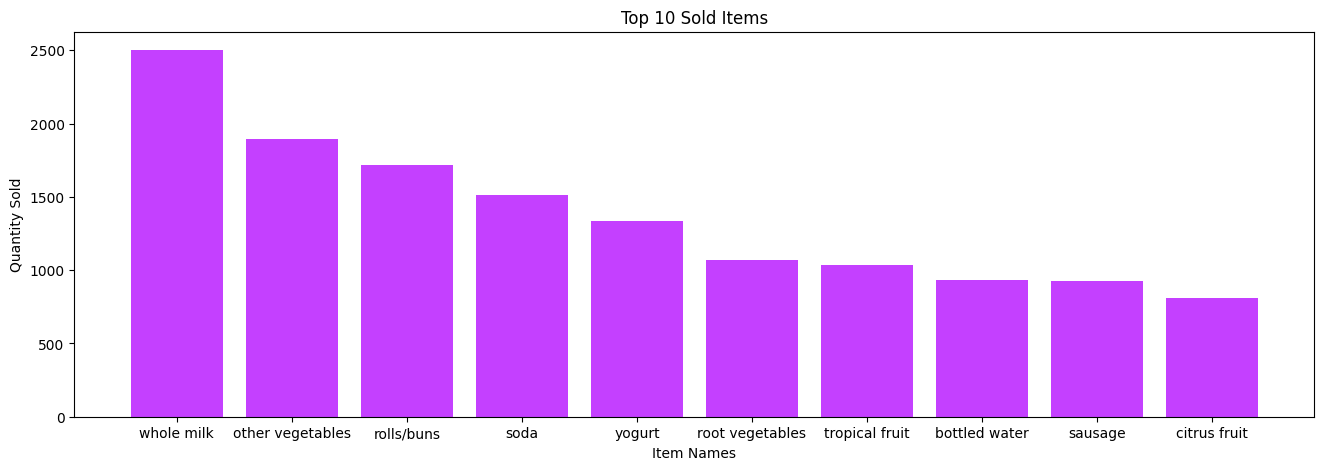

In [15]:
itemDstbn=df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)

bars=itemDstbn["itemDescription"]
height=itemDstbn["Frequency"]
xPos=np.arange(len(bars))

mp.figure(figsize=(16,5))
# mp.bar(xPos, height, color=(0.2, 0.3, 0.5, 0.5))
mp.bar(xPos, height, color=(0.69, 0, 1, 0.75))
mp.title("Top 10 Sold Items")
mp.xlabel("Item Names")
mp.ylabel("Quantity Sold")
mp.xticks(xPos, bars)
mp.show()

In [16]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of items sold')]

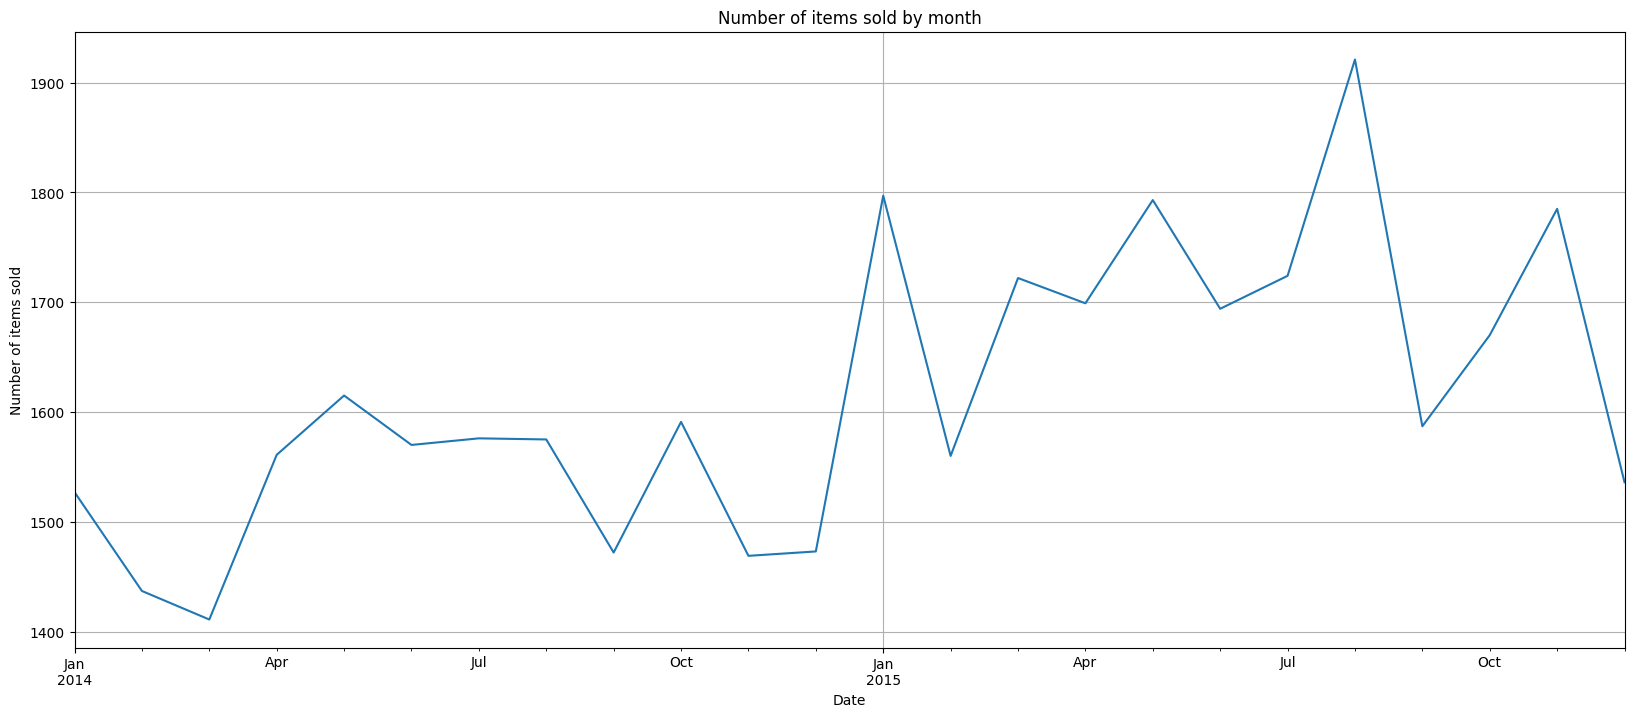

In [17]:
import pandas as pd

# Example DataFrame
data = df

df_date = pd.DataFrame(data)
df_date["date"] = pd.to_datetime(df_date["date"])  # Convert the date column to a DateTime format
df_date.set_index("date", inplace=True)  # Set the DateTime column as the index

# Now you can use resample
df_date.resample("M")["itemDescription"].count().plot(figsize=(20, 8), grid=True, title='Number of items sold by month').set(xlabel="Date", ylabel="Number of items sold")

### **Apriori Association Rules**

In [18]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level["itemDescription"]=cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [19]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [20]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [21]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_left=3,min_length=2)

In [22]:
results = list(rules)

In [23]:
results

[RelationRecord(items=frozenset({'UHT-milk'}), support=0.07850179579271421, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.07850179579271421, lift=1.0)]),
 RelationRecord(items=frozenset({'beef'}), support=0.11954848640328374, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.11954848640328374, lift=1.0)]),
 RelationRecord(items=frozenset({'berries'}), support=0.0797845048742945, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'berries'}), confidence=0.0797845048742945, lift=1.0)]),
 RelationRecord(items=frozenset({'beverages'}), support=0.0620831195484864, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beverages'}), confidence=0.0620831195484864, lift=1.0)]),
 RelationRecord(items=frozenset({'bottled beer'}), support=0.15879938429964083, ordered_statistics=[OrderedStatistic(items_base=frozenset(), ite

In [36]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0] for result in results]
  rhs=[tuple(result[2][0][1])[0] for result in results]
  supports=[result[1] for result in results]
  confidences=[result[2][0][2] for result in results]
  lifts=[result[2][0][3] for result in results]
  return list(zip(lhs,rhs,supports,confidences,lifts))

### **Recommendation System**